# Bivariate: Numeric vs Categorical

In [2]:
require(tidyverse)
require(repr)

In [4]:
nhanes <-  read_csv('Datasets/nhanes.csv')
INEC <- read_csv("Datasets/INEC.csv")

# Grouped Boxplot

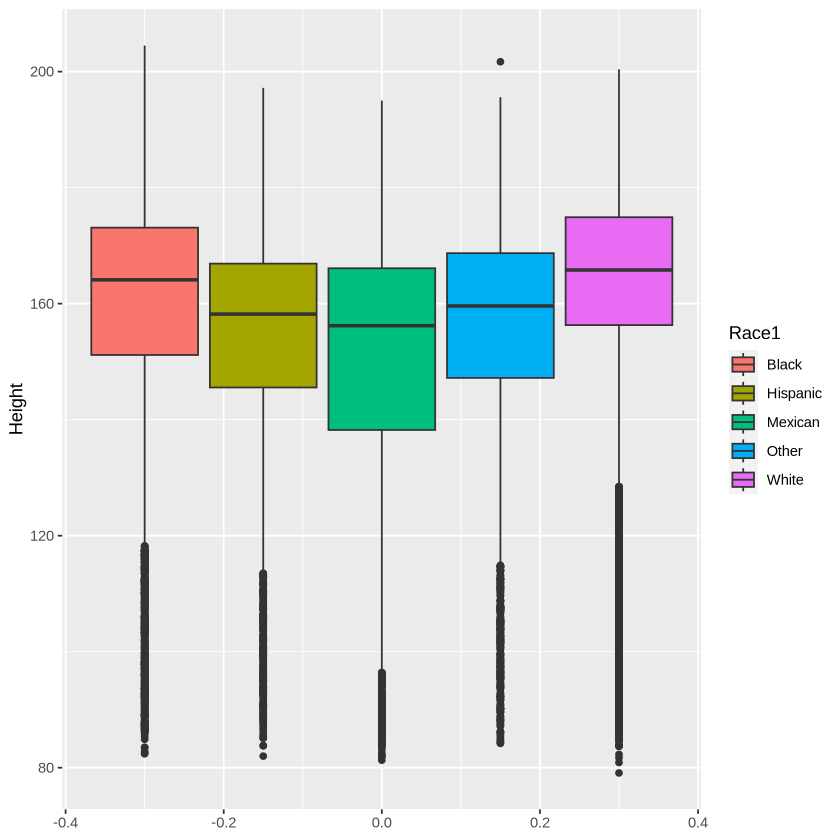

In [5]:
nhanes %>% 
    filter(!is.na(Height)) %>%
    ggplot() + 
        geom_boxplot(aes(y=Height, fill=Race1))

# Violin plot

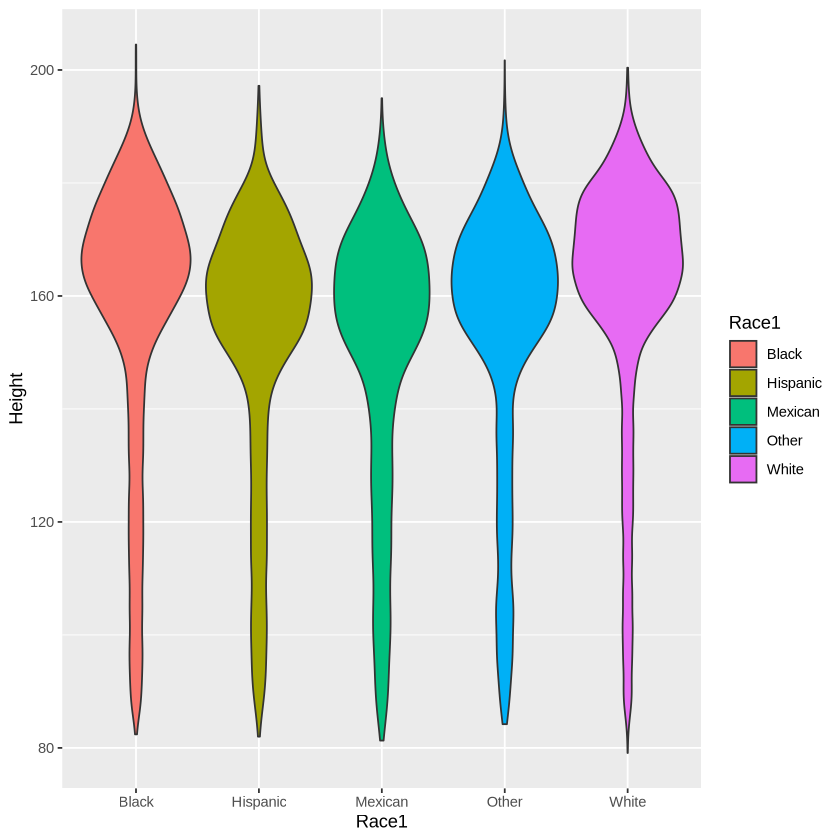

In [6]:
nhanes %>% 
    filter(!is.na(Height)) %>%
    ggplot() + 
        geom_violin(aes(y=Height, x=Race1, fill=Race1))

# Bar charts

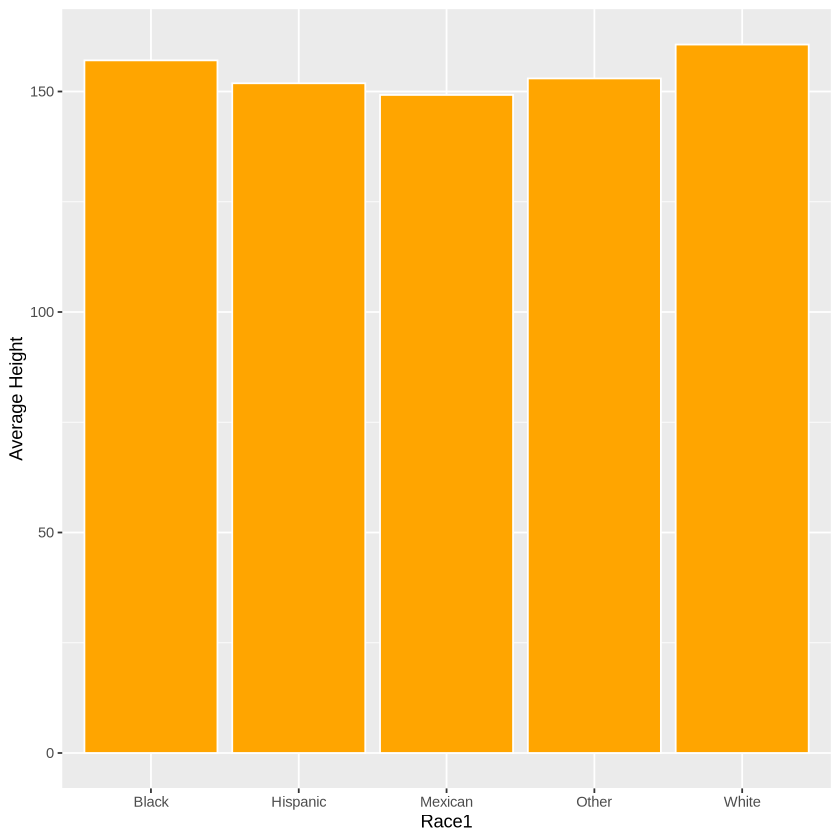

In [7]:
nhanes %>% 
    group_by(Race1) %>%
    summarise(`Average Height`=mean(Height, na.rm=T), SD=sd(Height, na.rm=T)) %>% 
    ggplot() + 
        geom_col(aes(x=Race1, y=`Average Height`), fill='orange', col='white')

# You could add measures to the main measures under consideraton

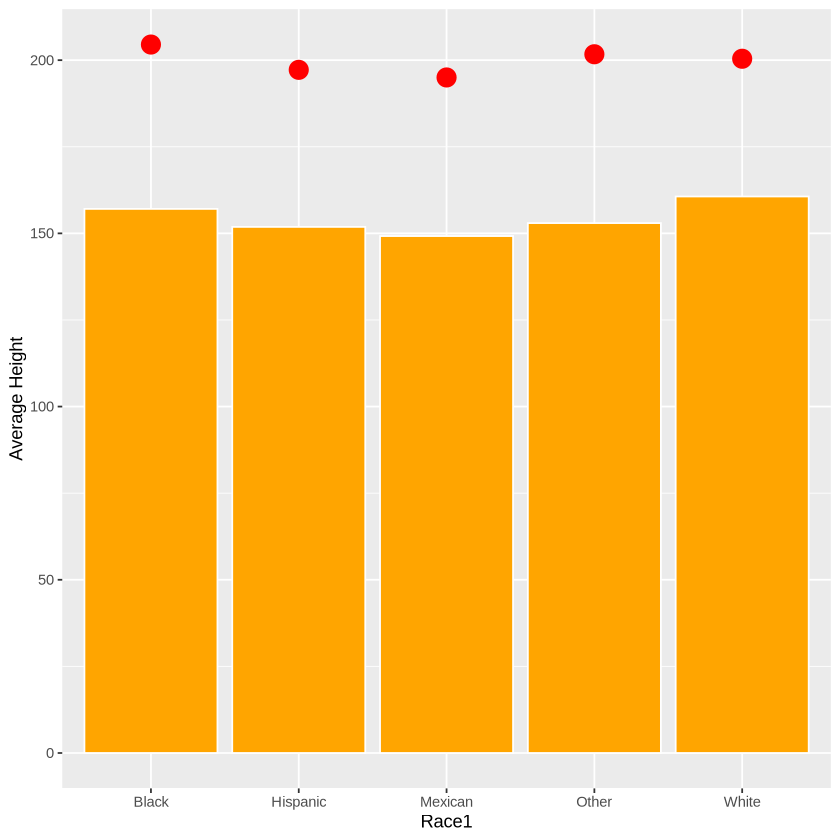

In [8]:
nhanes %>% 
    group_by(Race1) %>%
    summarise(`Average Height`=mean(Height, na.rm=T), Tallest=max(Height, na.rm=T)) %>% 
    ggplot() + 
        geom_col(aes(x=Race1, y=`Average Height`), fill='orange', col='white') + 
        geom_point(aes(x=Race1, y=Tallest), size=5, col='red')

# Scales from negative to positive

In [9]:
options(repr.plot.width=8, repr.plot.height=12)

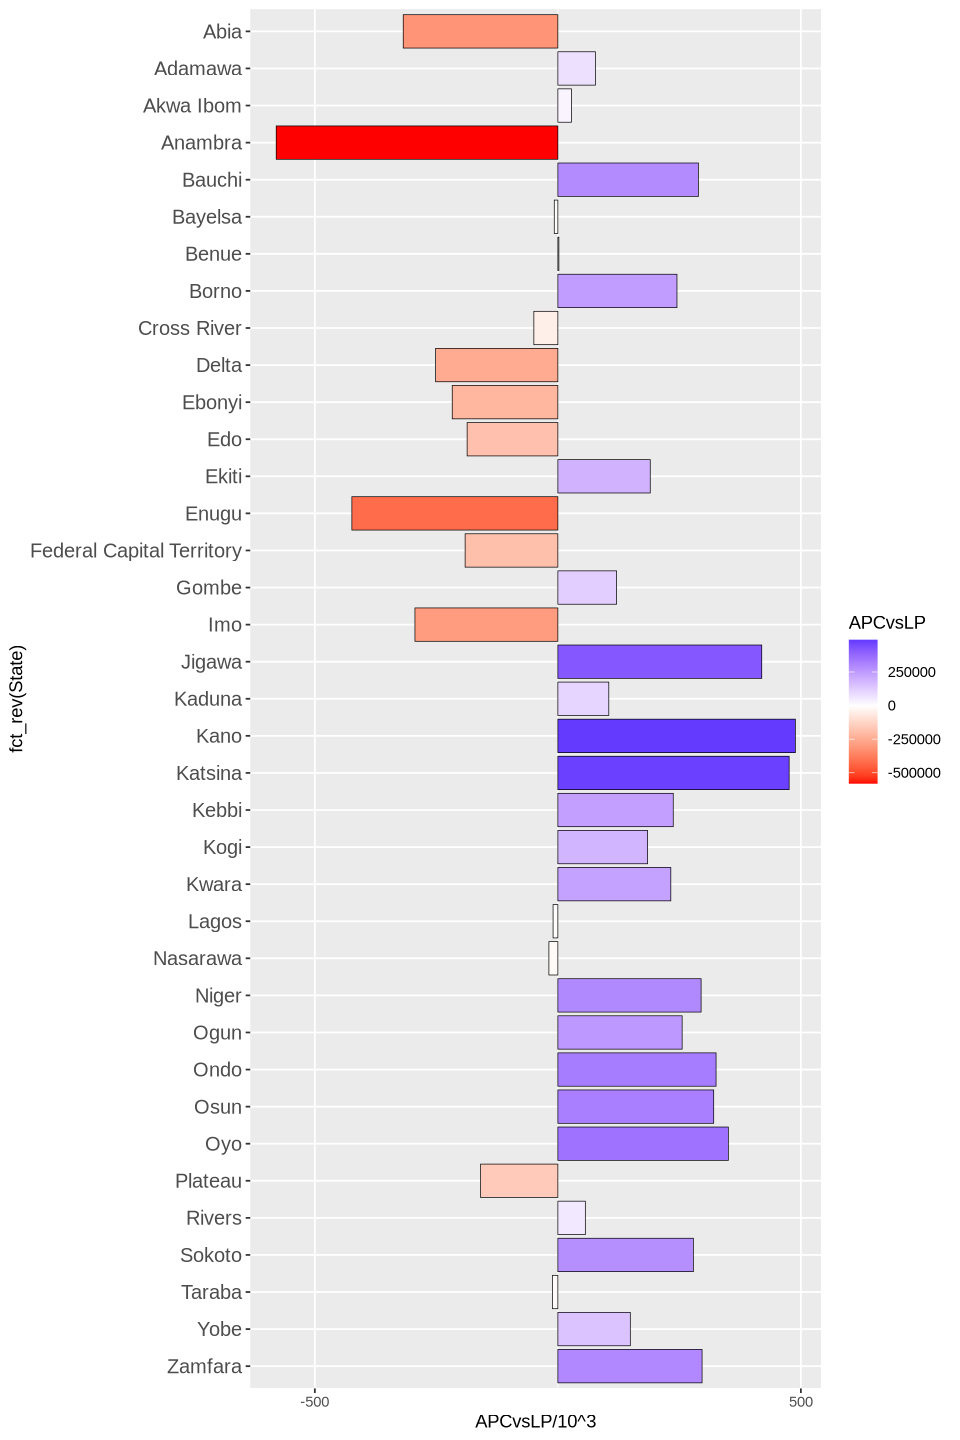

In [10]:
INEC %>% 
    mutate(APCvsLP = APC - LP) %>% 
    ggplot() + 
        geom_col(aes(x=APCvsLP/10^3, y=fct_rev(State), fill=APCvsLP), col='black', lwd=0.2) + 
        scale_fill_gradient2(low='red', midpoint=0, high='blue') + 
        scale_x_continuous(n.breaks = 2) + 
        theme(axis.text.y = element_text(size = 12))